<h1 align='center'>Bruins Stats</h1>
<img src='http://thepinkpuck.com/wp-content/uploads/2014/10/boston-bruins-logo.jpg', align='center', heigh=200, width=250>
<h5 align='center'>Years 2015 - 2021</h5>

In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
plt.style.use('seaborn-bright')

In [18]:
# setting url data

url_2015 = 'https://www.hockey-reference.com/teams/BOS/2015_games.html'
url_2016 = 'https://www.hockey-reference.com/teams/BOS/2016_games.html'
url_2017 = 'https://www.hockey-reference.com/teams/BOS/2017_games.html'
url_2018 = 'https://www.hockey-reference.com/teams/BOS/2018_games.html'
url_2019 = 'https://www.hockey-reference.com/teams/BOS/2019_games.html'
url_2020 = 'https://www.hockey-reference.com/teams/BOS/2020_games.html'
url_2021 = 'https://www.hockey-reference.com/teams/BOS/2021_games.html'

# creating dataframe for each year
df_2015 = pd.read_html(url_2015)[0]
df_2016 = pd.read_html(url_2016)[0]
df_2017 = pd.read_html(url_2017)[0]
df_2018 = pd.read_html(url_2018)[0]
df_2019 = pd.read_html(url_2019)[0]
df_2020 = pd.read_html(url_2020)[0]
df_2021 = pd.read_html(url_2021)[0]
#df_2020 = df_2020.drop(columns=['Time']) # dropping time column to match

# rename columns to match
#df_2020.rename(columns = {'Unnamed: 7': 'Unnamed: 6', 'Unnamed: 8': 'Unnamed: 7'}, inplace=True)

years = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]

b_data = pd.concat(years, sort=False)

b_data = b_data[b_data.GP != 'GP']

b_data.rename(columns = {'Unnamed: 6':'Result', 'Unnamed: 7': 'OT_SO'}, inplace = True)



<h2>Total Games Played</h2>

In [19]:
tgp = b_data['Result'].count()
print(" " , tgp)

  536


<h2> Wins vs Loss </h2>

Wins: 303 Loss: 233


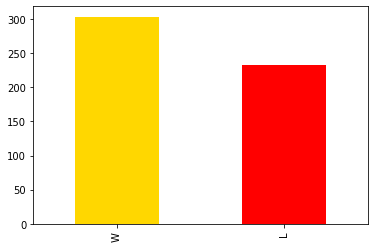

In [20]:
w_l = b_data['Result'].value_counts().values
print('Wins:',w_l[0],'Loss:',w_l[1])
b_data['Result'].value_counts().plot(kind='bar', color=['gold', 'red']);

<h2>OT vs SO</h2>

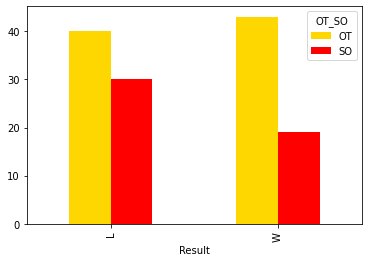

In [21]:
b_data.groupby('Result')['OT_SO'].value_counts().unstack().plot(kind='bar', color=['gold','red']);

In [30]:
def opp_team(team):
    opp_games = b_data[b_data['Opponent'].str.contains(team)]
    opp_games = opp_games.sort_values(by='Date')
    opp_games[['GF','GA']] = opp_games[['GF','GA']].apply(pd.to_numeric)
    game_count = opp_games['Result'].value_counts()
    goals = opp_games[['GF','GA']].sum()
    total_games = opp_games['Result'].count()
    total_wins = opp_games['Result'].str.contains('W').sum()
   
    

    print()
    print(tabulate(opp_games.iloc[:,[1,3,4,5,6,7]].tail(), headers='keys', tablefmt='psql', showindex=False))Present
    print()
    print(game_count.to_string())
    
    plt.figure(figsize=(8,8))
    plt.subplot(3, 1, 1)
    game_count.plot(kind='bar', color=['gold', 'red'])
    plt.title('Wins vs Loss')
    plt.show()
    
    print()
    print(goals.to_string())
    plt.figure(figsize=(8,8))
    plt.subplot(3, 1, 2)
    goals.plot(kind='bar', color=['gold', 'red'])
    plt.title('Total Goals')
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.subplot(3,1,2)
    opp_games.groupby('Result')['OT_SO'].value_counts().plot(kind='bar')
    plt.show()
      
    

<h2>Opponent</h2>


+------------+--------------------+------+------+----------+---------+
| Date       | Opponent           |   GF |   GA | Result   | OT_SO   |
|------------+--------------------+------+------+----------+---------|
| 2021-04-15 | New York Islanders |    4 |    1 | W        | nan     |
| 2021-04-16 | New York Islanders |    3 |    0 | W        | nan     |
| 2021-05-06 | New York Rangers   |    4 |    0 | W        | nan     |
| 2021-05-08 | New York Rangers   |    4 |    5 | L        | nan     |
| 2021-05-10 | New York Islanders |    3 |    2 | W        | OT      |
+------------+--------------------+------+------+----------+---------+

W    30
L    22


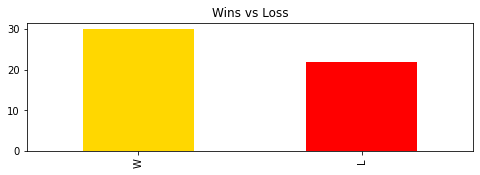


GF    150
GA    122


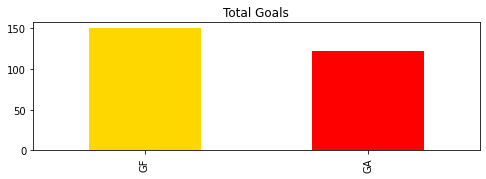

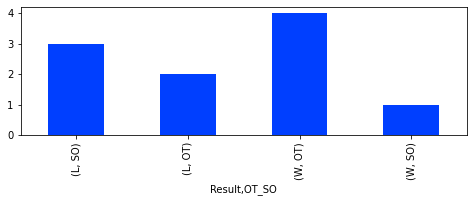

In [31]:
opp_team('New York')